# Assignment 6. Part 2: Backtracking for CSPs

In [1]:
import os
import sys

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A6/src' #@param {type: "string"}
sys.path.append(path)

## CSPs OVERVIEW

**CSPs** are a special kind of search problems. Here we don't treat the space as a black box but the state has a particular form and we use that to our advantage to tweak our algorithms to be more suited to the problems.

A *CSP State* is defined by a set of variables which can take values from corresponding domains. These variables can take only certain values in their *domains* to satisfy the *constraints*.

A set of assignments which satisfies all constraints passes the goal test.

   A CSP is specified by the following *inputs*:
  * *variables*   A list of variables; each is atomic (e.g. int or string).
  * *domains*     A dict of {var:[possible_value, ...]} entries.
  * *neighbors*   A dict of {var:[var,...]} that for each variable lists the other variables that participate in constraints.
  * *constraints* A function f(A, a, B, b) that returns true if neighbors A, B satisfy the constraint when they have values A=a, B=b

*CSP* class is a derived class from the base *Problem* class

`class CSP (Problem)`

A CSP class consists of all is CSP's inputs mentioned above.

The `__ _ init _ __` method parameters specify the CSP.

`Variables` can be passed as a list of strings or integers.

`Domains` are passed as dict where "key" specifies the variables and "value" specifies the domains.

The variables are passed as an empty list. Variables are extracted from the keys of the domain dictionary.

`Neighbor` is a dict of variables that essentially describes the constraint graph. Here each variable key has a list of its values which are the variables that are constraint along with it.

The `constraint` parameter should be a function f(A, a, B, b) that returns true if neighbors A, B satisfy the constraint when they have values A=a, B=b.

We have additional parameters like `nassings` which is incremented each time an assignment is made when calling the `assign` method.


The CSP class also supports data structures and methods that help you solve CSPs by calling a search function on the CSP.

Methods and slots are as follows, where the argument 'a' represents an assignment, which is a dict of *{var:val}* entries

In [9]:
from CSPclass import CSP
help(CSP)

Help on class CSP in module CSPclass:

class CSP(CSPBasic)
 |  CSP(variables, domains, neighbors, constraints)
 |  
 |  Method resolution order:
 |      CSP
 |      CSPBasic
 |      problemClass.Problem
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  assign(self, var, val, assignment)
 |      Add {var: val} to assignment; Discard the old value if any.
 |  
 |  choices(self, var)
 |      Return all values for var that aren't currently ruled out.
 |  
 |  display(self, assignment)
 |      Show a human-readable representation of the CSP.
 |  
 |  nconflicts(self, var, val, assignment)
 |      Return the number of conflicts var=val has with other variables.
 |  
 |  unassign(self, var, assignment)
 |      Remove {var: val} from assignment.
 |      DO NOT call this if you are changing a variable to a new value;
 |      just call assign for that.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from CSPBasic:
 |  
 |  __ini

In [10]:
help(CSP.assign)

Help on function assign in module CSPclass:

assign(self, var, val, assignment)
    Add {var: val} to assignment; Discard the old value if any.



## Australia map-coloring problem

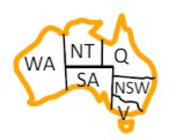

The idea of **map coloring problem** is that *the adjacent nodes (those connected by edges) should not have the same color throughout the graph*.

The graph can be colored using a fixed number of colors.

Here *each node is a variable* and the values are the colors that can be assigned to them.

Given that the domain will be the same for all our nodes we use a custom dict defined by the `UniversalDict` class.

The `UniversalDict Class` takes in a parameter and returns it as a value for all the keys of the dict.

It does not support item assignment.

In [11]:
from utils import UniversalDict

In [12]:
australiaColors=UniversalDict(list('RGB'))

In [13]:
print(australiaColors['SA'],australiaColors['NT'])

['R', 'G', 'B'] ['R', 'G', 'B']


Our `CSP Class` includes the *constraint parameter* which should be a function *f(A, a, B, b)*

So, we need to define a constraint function f(A, a, B, b).

In this case , we need to ensure that the neighbors don't have the same color.

This is defined in the function `different_values_constraint` of the module `Utils.py.`

In [14]:
from utils import different_values_constraint
help(different_values_constraint)

Help on function different_values_constraint in module utils:

different_values_constraint(A, a, B, b)
    A constraint saying two neighboring variables must differ in value.



The CSP class takes neighbors in the form of a Dictionary.

`{'Y': ['X', 'Z'], 'X': ['Y', 'Z'], 'Z': ['X', 'Y']}`

A simple helper function `parse_neighbors` allows us to take *input in the form of strings* and return a Dict of a form that is compatible with the CSP Class.

In [15]:
from utils import parse_neighbors
help(parse_neighbors)

Help on function parse_neighbors in module utils:

parse_neighbors(neighbors)
    Convert a string of the form 'X: Y Z; Y: Z' into a dict mapping
    regions to neighbors. The syntax is a region name followed by a ':'
    followed by zero or more region names, followed by ';', repeated for
    each region name. If you say 'X: Y' you don't need 'Y: X'.
    >>> parse_neighbors('X: Y Z; Y: Z') == {'Y': ['X', 'Z'], 'X': ['Y', 'Z'], 'Z': ['X', 'Y']}
    True



In [16]:
australia="SA: WA NT Q NSW V; NT: WA Q; NSW: Q V; T: "

In [17]:
parse_neighbors(australia)

defaultdict(list,
            {'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
             'WA': ['SA', 'NT'],
             'NT': ['SA', 'WA', 'Q'],
             'Q': ['SA', 'NT', 'NSW'],
             'NSW': ['SA', 'Q', 'V'],
             'V': ['SA', 'NSW']})

The `MapColoringCSP` function creates and returns a CSP with the above constraint function and states.

The variables are the keys of the *neighbors* dict and the constraint is the one specified by the *different_values_constratint* function.

In [18]:
from CSPS import MapColoringCSP
help(MapColoringCSP)


Help on function MapColoringCSP in module CSPS:

MapColoringCSP(colors, neighbors)
    Make a CSP for the problem of coloring a map with different colors
    for any two adjacent regions. Arguments are a list of colors, and a
    dict of {region: [neighbor,...]} entries. This dict may also be
    specified as a string of the form defined by parse_neighbors.



In [20]:
australiaCSP = MapColoringCSP(list('RGB'), australia)

In [21]:
australiaCSP.variables

['SA', 'WA', 'NT', 'Q', 'NSW', 'V']

In [22]:
australiaCSP.domains

Any from ['R', 'G', 'B']

In [23]:
australiaCSP.neighbors

defaultdict(list,
            {'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
             'WA': ['SA', 'NT'],
             'NT': ['SA', 'WA', 'Q'],
             'Q': ['SA', 'NT', 'NSW'],
             'NSW': ['SA', 'Q', 'V'],
             'V': ['SA', 'NSW']})

## Backtracking Search

 In backtracking search, we check the constraints as we go and we deal with only one variable at a time

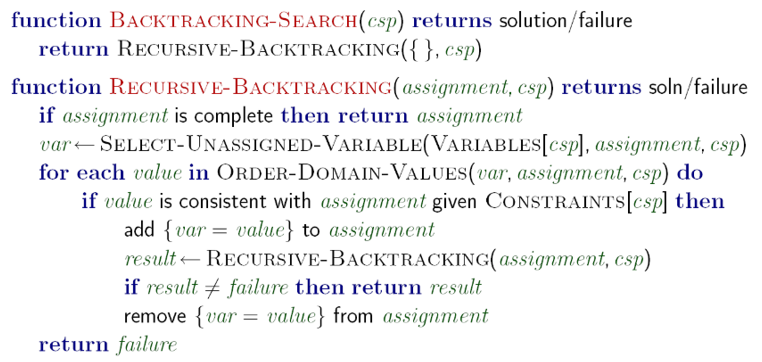

In [24]:
from algorithms import backtracking_search

In [25]:
result = backtracking_search(australiaCSP)

In [26]:
result

{'SA': 'R', 'WA': 'G', 'NT': 'B', 'Q': 'G', 'NSW': 'B', 'V': 'G'}

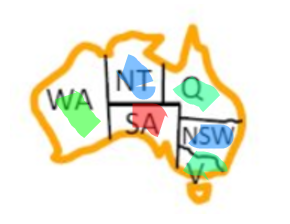

## **Task  - 20 points**

### The Dinner Accomodation Problem

Five colleagues (designated A, B, C, D, E) are planning to go to dinner but they don’t all get along.

Specifically:
* A despises B
* B always argues with E
* C is B's manager, so B does not want to be subject to the extra scrutiny of sitting next to C.

You need to place them around a dining table with 6 chairs to avoid any potential problems.

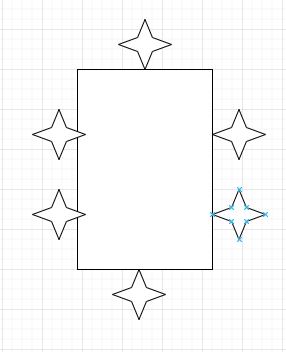



### Tasks:

1. Formulate the problem (presented above) as a CSP problem.
2. Develop CSP implementation (based on CSP class)
3. After running constraint propagation once without search, do any of the domains change? (Apply AC-3 for the answer)
4. Apply a backtracking search algorithm to solve ths problem